In [1]:
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib
import matplotlib.animation as animation


sns.set(rc={"xtick.bottom" : True, "ytick.left" : True, 'font.sans-serif': 'Liberation Sans'},context='paper',
        style='white', palette='Set1')

In [2]:
output_spikes_L = pickle.load(open('slip_output_L.pkl', 'rb'))
#output_spikes_L = pickle.load(open('slip_output_L_negative.pkl', 'rb'))

Text(0.5, 0, 'Time (s)')

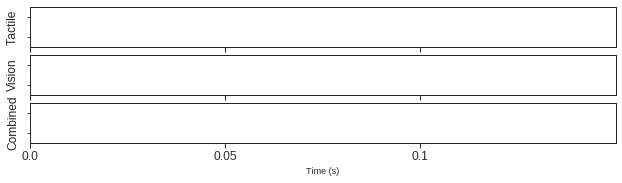

In [3]:
fig, ax = plt.subplots(figsize=[10.5, 2.5], nrows=3, sharex=True)
cols = [sns.palettes.color_palette('Set1')[1], sns.palettes.color_palette('Set1')[0], sns.palettes.color_palette('Set1')[2]]
#cols_tact = [cols[0]] * 1 + [cols[1]]
#cols_corr = [cols[0]] * 1 + [cols[2]]
cols_corr = [cols[0]]*2
plt.xlim([0, 150])
plt.xticks(np.arange(0, 150, 50), np.arange(0, 150, 50) * (0.15/150))
ax[0].set_yticks([])
ax[1].set_yticks([])
ax[2].set_yticks([])
ax[2].tick_params(labelsize=12)
ax[0].set_ylabel('Tactile', fontsize=12)
ax[1].set_ylabel('Vision', fontsize=12)
ax[2].set_ylabel('Combined', fontsize=12)
ax[0].set_ylim([-0.5, 1.5])
ax[1].set_ylim([-0.5, 1.5])
ax[2].set_ylim([-0.5, 1.5])
ax[0].set_yticks(np.arange(0, 2, 1), minor=True)
ax[0].tick_params(axis='y', which='minor')
ax[1].set_yticks(np.arange(0, 2, 1), minor=True)
ax[1].tick_params(axis='y', which='minor')
ax[2].set_yticks(np.arange(0, 2, 1), minor=True)
ax[2].tick_params(axis='y', which='minor')
plt.xlabel('Time (s)', fontsize=9)


In [4]:
# set writer
Writer = animation.writers['ffmpeg']
writer = Writer(fps=100, metadata=dict(artist='Me'), bitrate=5000)

In [5]:
def animate(t):
    print(t)
    ax[0].eventplot([np.argwhere(output_spikes_L['tac'][:,:t][i] == 1).flatten() for i in range(2)], colors=cols_corr)
    ax[1].eventplot([np.argwhere(output_spikes_L['vis'][:,:t][i] == 1).flatten() for i in range(2)], colors=cols_corr)
    ax[2].eventplot([np.argwhere(output_spikes_L['mm'][:,:t][i] == 1).flatten() for i in range(2)], colors=cols_corr)

In [6]:
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=150, repeat=True)
ani.save('../vision2/slip_L_positive2.mp4', writer=writer)

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


In [7]:
plt.close()